In [1]:
%load_ext lab_black
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import random

# An overview of the dataset

In this project I will be working with the dataset `p1_communes.csv`, consisting in a collection of demographic and geographic information for all communes in Switzerland provided by the Federal Statistical Office of Switzerland.

In particular, in this first section I will gather and formalize some preliminary information about the dataset before jumping into data exploration.

## Importing the data

I will start importing the dataset as a Pandas DataFrame, naming it as `df`.

In [2]:
df = pd.read_csv("p1_communes.csv")

## Checking the number of rows and columns

The `info()` method of dataframe objects comes handy for quickly grasping initial information about the dataset.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2202 entries, 0 to 2201
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Canton                      2199 non-null   object 
 1   Commune                     2202 non-null   object 
 2   Language                    2191 non-null   object 
 3   Residents                   2202 non-null   int64  
 4   Population density per km²  2202 non-null   float64
 5   0-19 years                  2202 non-null   float64
 6   20-64 years                 2202 non-null   float64
 7   65 years or over            2202 non-null   float64
 8   Private households          2202 non-null   int64  
 9   Surface area in km²         2202 non-null   float64
 10  Settlement area             2202 non-null   float64
 11  Agricultural area           2202 non-null   float64
 12  Wooded area                 2202 non-null   float64
 13  Unproductive area           2202 

***
In particular, the output above tells us:

1. The total number of rows: **2202**, indexed from 0 to 2201 (suggested by *RangeIndex: 2202 entries, 0 to 2201*)
2. The total number of columns: **17**, indexed from 0 to 16
3. How many non-null entries are there for each column
4. What is the data type of each column: float (9 columns in total), integer (5 columns) or object (3 columns)

It is worth mentioning that object is the most generic data type in Pandas, and such label is automatically assigned by Pandas also to *string* types.

## Displaying the first few entries

The `head()` method of dataframe objects is useful for a rapid observation of which kind of entries I can expect in this dataset.

In [4]:
df.head()

,Canton,Commune,Language,Residents,Population density per km²,0-19 years,20-64 years,65 years or over,Private households,Surface area in km²,Settlement area,Agricultural area,Wooded area,Unproductive area,East coordinate,North coordinate,Elevation
0,ZH,Aeugst am Albis,de,1982,250.568900,19.677094,62.764884,17.558022,835,7.91,12.658228,51.139241,30.886076,5.316456,2679300,1235700,673
1,ZH,Affoltern am Albis,de,12229,1154.768650,20.508627,61.329626,18.161747,5348,10.59,30.674264,40.170940,28.205128,0.949668,2676800,1236800,502
2,ZH,Bonstetten,de,5548,746.702557,23.666186,60.310022,16.023792,2325,7.43,15.456989,55.510753,28.629032,0.403226,2677800,1241000,583
3,ZH,Hausen am Albis,de,3701,272.132353,21.804918,60.686301,17.508781,1546,13.60,12.692590,55.906090,28.833456,2.567865,2682900,1233100,653
4,ZH,Hedingen,de,3734,571.822358,21.772898,61.756829,16.470273,1540,6.53,19.817073,46.341463,33.231707,0.609756,2676400,1239000,543


By importing the dataset with Pandas it has been already formatted with the correct column names and the default row indexing.
The `df.head()` method by default returns the first 5 rows, but I can choose to display a different amount, for instance 10, if I would prefer observing additional entries.

In [5]:
df.head(10)

,Canton,Commune,Language,Residents,Population density per km²,0-19 years,20-64 years,65 years or over,Private households,Surface area in km²,Settlement area,Agricultural area,Wooded area,Unproductive area,East coordinate,North coordinate,Elevation
0,ZH,Aeugst am Albis,de,1982,250.568900,19.677094,62.764884,17.558022,835,7.91,12.658228,51.139241,30.886076,5.316456,2679300,1235700,673
1,ZH,Affoltern am Albis,de,12229,1154.768650,20.508627,61.329626,18.161747,5348,10.59,30.674264,40.170940,28.205128,0.949668,2676800,1236800,502
2,ZH,Bonstetten,de,5548,746.702557,23.666186,60.310022,16.023792,2325,7.43,15.456989,55.510753,28.629032,0.403226,2677800,1241000,583
3,ZH,Hausen am Albis,de,3701,272.132353,21.804918,60.686301,17.508781,1546,13.60,12.692590,55.906090,28.833456,2.567865,2682900,1233100,653
4,ZH,Hedingen,de,3734,571.822358,21.772898,61.756829,16.470273,1540,6.53,19.817073,46.341463,33.231707,0.609756,2676400,1239000,543
5,ZH,Kappel am Albis,de,1157,146.085859,25.237684,60.760588,14.001729,465,7.92,8.312020,69.948849,20.588235,1.150895,2682400,1231300,559
6,ZH,Knonau,de,2373,366.769706,23.893805,61.061947,15.044248,925,6.47,18.027735,62.249615,17.103236,2.619414,2677500,1230900,454
7,ZH,Maschwanden,de,656,139.872068,23.018293,59.756098,17.225610,272,4.69,8.974359,59.615385,23.717949,7.692308,2674800,1232000,410
8,ZH,Mettmenstetten,de,5094,390.943975,22.732627,59.776207,17.491166,2050,13.03,15.990819,64.269319,18.592196,1.147666,2677600,1233000,493
9,ZH,Obfelden,de,5599,742.572944,23.504197,59.778532,16.717271,2302,7.54,24.338624,49.074074,21.428571,5.158730,2675100,1235300,439


## Index labels and column names

There are also two attributes that can help me perform quick initial assessments on the dataset structure: `index` and `columns`. Respectively, they will return the current index labels and the column names.

In [6]:
df.index

RangeIndex(start=0, stop=2202, step=1)

In [7]:
df.columns

Index(['Canton', 'Commune', 'Language', 'Residents',
       'Population density per km²', '0-19 years', '20-64 years',
       '65 years or over', 'Private households', 'Surface area in km²',
       'Settlement area', 'Agricultural area', 'Wooded area',
       'Unproductive area', 'East coordinate', 'North coordinate',
       'Elevation'],
      dtype='object')

Index labels, belonging to a range from 0 to 2202 (with 2202 excluded), and the 17 column names displayed above confirm the observations performed with the `info()` method.

I can also conveniently store the column names as a list in a new variable using the `to_list()` method.

In [8]:
columns = df.columns.to_list()
print(columns)

['Canton', 'Commune', 'Language', 'Residents', 'Population density per km²', '0-19 years', '20-64 years', '65 years or over', 'Private households', 'Surface area in km²', 'Settlement area', 'Agricultural area', 'Wooded area', 'Unproductive area', 'East coordinate', 'North coordinate', 'Elevation']


## Data types per column

I can also double check the data types of each column leveraging the `dtypes` attribute, which will return a convenient Series object for this purpose.

In [9]:
df.dtypes

Canton                         object
Commune                        object
Language                       object
Residents                       int64
Population density per km²    float64
0-19 years                    float64
20-64 years                   float64
65 years or over              float64
Private households              int64
Surface area in km²           float64
Settlement area               float64
Agricultural area             float64
Wooded area                   float64
Unproductive area             float64
East coordinate                 int64
North coordinate                int64
Elevation                       int64
dtype: object

This matches as well with the initial output coming from `info()`.

## Finding missing values

The `info()` method had already informed me of certain columns with some missing values: I could conclude that because, for such columns, the number of rows without a null value was lower than the total number of rows of the dataset (2202).

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2202 entries, 0 to 2201
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Canton                      2199 non-null   object 
 1   Commune                     2202 non-null   object 
 2   Language                    2191 non-null   object 
 3   Residents                   2202 non-null   int64  
 4   Population density per km²  2202 non-null   float64
 5   0-19 years                  2202 non-null   float64
 6   20-64 years                 2202 non-null   float64
 7   65 years or over            2202 non-null   float64
 8   Private households          2202 non-null   int64  
 9   Surface area in km²         2202 non-null   float64
 10  Settlement area             2202 non-null   float64
 11  Agricultural area           2202 non-null   float64
 12  Wooded area                 2202 non-null   float64
 13  Unproductive area           2202 

***
In particular, I can easily spot the columns *Canton* and *Language* having a certain amount of missing values.
Having this key information in mind, I can apply a boolean selection to `df` to filter out only the rows in which such missing values are located.

In [11]:
missing_values_df = df[df["Canton"].isnull() | df["Language"].isnull()]
missing_values_df

,Canton,Commune,Language,Residents,Population density per km²,0-19 years,20-64 years,65 years or over,Private households,Surface area in km²,Settlement area,Agricultural area,Wooded area,Unproductive area,East coordinate,North coordinate,Elevation
155,ZH,Stammheim,NaN,2747,114.649416,21.405169,58.281762,20.313069,1125,23.96,9.056761,55.801336,34.557596,0.584307,2702400,1276500,455
156,ZH,Wädenswil,NaN,24341,682.968575,19.740356,59.944127,20.315517,10371,35.64,19.336706,63.265880,15.064643,2.332771,2693400,1231600,641
157,ZH,Elgg,NaN,4903,201.025010,20.762798,60.473180,18.764022,2121,24.39,9.545268,46.907005,43.138058,0.409668,2707700,1260900,598
158,ZH,Horgen,NaN,22665,735.160558,20.657401,60.480918,18.861681,9685,30.83,18.456049,38.858255,39.506974,3.178722,2687800,1234900,624
440,NaN,Thurnen,NaN,1922,323.025210,20.759625,58.324662,20.915713,814,5.95,13.949580,79.159664,6.050420,0.840336,2605300,1184700,558
704,NaN,Villaz,NaN,2287,148.217758,24.398776,61.346742,14.254482,897,15.44,8.808290,70.336788,20.401554,0.453368,2563200,1174400,727
757,NaN,Prez,NaN,2236,139.401496,25.000000,61.672630,13.327370,839,16.04,6.924517,68.808484,23.268871,0.998129,2567700,1181700,651
1133,GR,Bergün Filisur,NaN,905,4.759651,16.574586,59.668508,23.756906,397,190.14,0.977815,19.824414,27.541794,51.655977,2776700,1166700,2273
1165,GR,Rheinwald,NaN,577,4.217220,16.984402,54.072790,28.942808,266,136.82,1.124334,34.328685,14.448419,50.098562,2744500,1157500,2192
1626,TI,Riviera,NaN,4220,48.780488,20.071090,61.445498,18.483412,1774,86.58,4.008317,7.034770,65.553887,23.403026,2718700,1128900,1458


I can then use the `count()` method over this subset of the original dataset to quickly count how many rows are affected. Such method counts the non-NA values per column, and the maximum amount shown will indicate me the number of affected rows.

In [12]:
missing_values_df.count()

Canton                         8
Commune                       11
Language                       0
Residents                     11
Population density per km²    11
0-19 years                    11
20-64 years                   11
65 years or over              11
Private households            11
Surface area in km²           11
Settlement area               11
Agricultural area             11
Wooded area                   11
Unproductive area             11
East coordinate               11
North coordinate              11
Elevation                     11
dtype: int64

In [13]:
print(
    f"The number of affected rows is: {missing_values_df.count().max()}"
)  # using max() to determine the maximum value of the Series object returned by count()

The number of affected rows is: 11


In this way I preserved the indexing of the original dataset, while automatically calculating the number of rows. In this case I could have done it "visually", but in case of a larger number of missing values it would have been a tedious exercise.

### An alternative approach using isnull() and any()

My previous approach started from a visual analysis of the output of the `info()` method, which has been relatively simple considering the limited amount of columns (17) and the concentration of missing values into just two of them. 

Ideally, I should rely upon an approach working smoothly with any number of rows, columns and missing values, which I am about to demonstrate using the methods `isnull()` and `any()`.

I had already leveraged `isnull()` in the boolean selection of the first approach: it returns the *mask* of the original `df`, corresponding to a dataset of the same size but with null values replaced with **True** and the remaining ones with **False**.

In [14]:
df.isnull().head()

,Canton,Commune,Language,Residents,Population density per km²,0-19 years,20-64 years,65 years or over,Private households,Surface area in km²,Settlement area,Agricultural area,Wooded area,Unproductive area,East coordinate,North coordinate,Elevation
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


At this point, the `any(axis=1)` method will check if at least one element of any given row is True, in that case returning True, otherwise False.

In [15]:
df.isnull().any(axis=1)  # axis=1 as I am checking across columns

0       False
1       False
2       False
3       False
4       False
        ...  
2197    False
2198    False
2199    False
2200    False
2201    False
Length: 2202, dtype: bool

Finally, I can leverage the resulting Series object to spot the rows with missing values through another boolean selection

In [16]:
missing_values_df = df[df.isnull().any(axis=1)]
missing_values_df

,Canton,Commune,Language,Residents,Population density per km²,0-19 years,20-64 years,65 years or over,Private households,Surface area in km²,Settlement area,Agricultural area,Wooded area,Unproductive area,East coordinate,North coordinate,Elevation
155,ZH,Stammheim,NaN,2747,114.649416,21.405169,58.281762,20.313069,1125,23.96,9.056761,55.801336,34.557596,0.584307,2702400,1276500,455
156,ZH,Wädenswil,NaN,24341,682.968575,19.740356,59.944127,20.315517,10371,35.64,19.336706,63.265880,15.064643,2.332771,2693400,1231600,641
157,ZH,Elgg,NaN,4903,201.025010,20.762798,60.473180,18.764022,2121,24.39,9.545268,46.907005,43.138058,0.409668,2707700,1260900,598
158,ZH,Horgen,NaN,22665,735.160558,20.657401,60.480918,18.861681,9685,30.83,18.456049,38.858255,39.506974,3.178722,2687800,1234900,624
440,NaN,Thurnen,NaN,1922,323.025210,20.759625,58.324662,20.915713,814,5.95,13.949580,79.159664,6.050420,0.840336,2605300,1184700,558
704,NaN,Villaz,NaN,2287,148.217758,24.398776,61.346742,14.254482,897,15.44,8.808290,70.336788,20.401554,0.453368,2563200,1174400,727
757,NaN,Prez,NaN,2236,139.401496,25.000000,61.672630,13.327370,839,16.04,6.924517,68.808484,23.268871,0.998129,2567700,1181700,651
1133,GR,Bergün Filisur,NaN,905,4.759651,16.574586,59.668508,23.756906,397,190.14,0.977815,19.824414,27.541794,51.655977,2776700,1166700,2273
1165,GR,Rheinwald,NaN,577,4.217220,16.984402,54.072790,28.942808,266,136.82,1.124334,34.328685,14.448419,50.098562,2744500,1157500,2192
1626,TI,Riviera,NaN,4220,48.780488,20.071090,61.445498,18.483412,1774,86.58,4.008317,7.034770,65.553887,23.403026,2718700,1128900,1458


In [17]:
print(
    f"The number of affected rows is: {missing_values_df.count().max()}"
)  # using max() to determine the maximum value of the Series object returned by count()

The number of affected rows is: 11


thus coming to the same conclusion of the first approach.

## Polishing the dataset

### Handling missing values with fillna() and dropna()

When it comes to dealing with missing values, there are 3 main options on the table:

1. Replace them with another relevant value, for example using `map()`
2. Remove them by deleting the affected rows in which they are found, for example using `dropna()`
3. Keeping them as they are in the dataset

Out of these options, I found the first two behind more appropriate for this kind of dataset, considering that:

1. The columns containing missing values (*Canton* and *Language*) are categorical, non-numerical.
2. I can reasonably assume that each canton has a prevalent language, i.e. the language of a commune could reasonably be inferred from the prevalent language of its canton.

In particular, I intend to use `dropna()` to remove the rows in which both *Canton* and *Language* are missing (3 rows in total), while I will use `fillna()` to infer and replace the missing *Language* values with the prevalent one of the related canton (in the remaining 8 rows).

**Dropna()**

I can achieve the first objective using `dropna()` while setting the *subset* to the relevant columns, using *how="all"* as criterion.</br>
Let's assess the effects of such method using `info()` before committing any change to the original dataset.

In [18]:
df.dropna(subset=["Canton", "Language"], how="all").info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2199 entries, 0 to 2201
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Canton                      2199 non-null   object 
 1   Commune                     2199 non-null   object 
 2   Language                    2191 non-null   object 
 3   Residents                   2199 non-null   int64  
 4   Population density per km²  2199 non-null   float64
 5   0-19 years                  2199 non-null   float64
 6   20-64 years                 2199 non-null   float64
 7   65 years or over            2199 non-null   float64
 8   Private households          2199 non-null   int64  
 9   Surface area in km²         2199 non-null   float64
 10  Settlement area             2199 non-null   float64
 11  Agricultural area           2199 non-null   float64
 12  Wooded area                 2199 non-null   float64
 13  Unproductive area           2199 

I can notice two important aspects:

* The number of rows has been reduced from 2202 to 2199, as expected given the 3 relevant rows I had identified.
* **Indexes keep referencing the original dataset**: they go up to 2201, when I would expect them to go up to 2198.

Additionally:
* The number of columns has remained the same, with the same column names.
* Column data types have been left unchanged.

This means that I must use `reset_index()` to adjust the rows indexing of the resulting polished dataset, before reassigning it to the `df` variable, thus effectively changing the original dataset.

In [19]:
df = df.dropna(subset=["Canton", "Language"], how="all").reset_index()
df.tail()

,index,Canton,Commune,Language,Residents,Population density per km²,0-19 years,20-64 years,65 years or over,Private households,Surface area in km²,Settlement area,Agricultural area,Wooded area,Unproductive area,East coordinate,North coordinate,Elevation
2194,2197,JU,Vendlincourt,fr,540,59.016393,18.888889,56.296296,24.814815,224,9.15,6.338798,55.846995,37.595628,0.218579,2578200,1255600,471
2195,2198,JU,Basse-Allaine,fr,1230,53.385417,21.869919,52.195122,25.934959,540,23.04,7.391304,44.043478,47.652174,0.913043,2569300,1258900,456
2196,2199,JU,Clos du Doubs,fr,1286,20.825911,18.895801,56.143079,24.961120,574,61.75,3.626356,42.884896,52.096487,1.392262,2579100,1246300,683
2197,2200,JU,Haute-Ajoie,fr,1095,26.752993,18.264840,56.347032,25.388128,493,40.93,4.054714,56.301905,39.618955,0.024426,2567000,1249100,592
2198,2201,JU,La Baroche,fr,1162,37.399421,21.514630,54.905336,23.580034,497,31.07,4.946996,48.988114,45.583039,0.481850,2582400,1252500,615


Notice how `reset_index()` assigned the appropriate indexing, but it didn't remove the previously existing one, now stored in the *index* column. For this purpose, I must use the `drop()` method, setting *inplace=True* to committ changes to `df`.

In [20]:
df.drop("index", axis=1, inplace=True)
df.tail()

,Canton,Commune,Language,Residents,Population density per km²,0-19 years,20-64 years,65 years or over,Private households,Surface area in km²,Settlement area,Agricultural area,Wooded area,Unproductive area,East coordinate,North coordinate,Elevation
2194,JU,Vendlincourt,fr,540,59.016393,18.888889,56.296296,24.814815,224,9.15,6.338798,55.846995,37.595628,0.218579,2578200,1255600,471
2195,JU,Basse-Allaine,fr,1230,53.385417,21.869919,52.195122,25.934959,540,23.04,7.391304,44.043478,47.652174,0.913043,2569300,1258900,456
2196,JU,Clos du Doubs,fr,1286,20.825911,18.895801,56.143079,24.961120,574,61.75,3.626356,42.884896,52.096487,1.392262,2579100,1246300,683
2197,JU,Haute-Ajoie,fr,1095,26.752993,18.264840,56.347032,25.388128,493,40.93,4.054714,56.301905,39.618955,0.024426,2567000,1249100,592
2198,JU,La Baroche,fr,1162,37.399421,21.514630,54.905336,23.580034,497,31.07,4.946996,48.988114,45.583039,0.481850,2582400,1252500,615


The output of `tail()` ensures me that the correct indexing has been effectively applied.

***
_**Note**: eventually, I could have found the Canton to which the three communes belonged with a quick Google research, then using fillna() instead of dropna(). Nonetheless, I preferred adopting an approach that strictly relied upon the dataset as unique source of information._
***

**Map()**

Let's have a look at the remaining rows with missing values.

In [21]:
missing_values_df = df[df.isnull().any(axis=1)]
missing_values_df

,Canton,Commune,Language,Residents,Population density per km²,0-19 years,20-64 years,65 years or over,Private households,Surface area in km²,Settlement area,Agricultural area,Wooded area,Unproductive area,East coordinate,North coordinate,Elevation
155,ZH,Stammheim,NaN,2747,114.649416,21.405169,58.281762,20.313069,1125,23.96,9.056761,55.801336,34.557596,0.584307,2702400,1276500,455
156,ZH,Wädenswil,NaN,24341,682.968575,19.740356,59.944127,20.315517,10371,35.64,19.336706,63.265880,15.064643,2.332771,2693400,1231600,641
157,ZH,Elgg,NaN,4903,201.025010,20.762798,60.473180,18.764022,2121,24.39,9.545268,46.907005,43.138058,0.409668,2707700,1260900,598
158,ZH,Horgen,NaN,22665,735.160558,20.657401,60.480918,18.861681,9685,30.83,18.456049,38.858255,39.506974,3.178722,2687800,1234900,624
1130,GR,Bergün Filisur,NaN,905,4.759651,16.574586,59.668508,23.756906,397,190.14,0.977815,19.824414,27.541794,51.655977,2776700,1166700,2273
1162,GR,Rheinwald,NaN,577,4.217220,16.984402,54.072790,28.942808,266,136.82,1.124334,34.328685,14.448419,50.098562,2744500,1157500,2192
1623,TI,Riviera,NaN,4220,48.780488,20.071090,61.445498,18.483412,1774,86.58,4.008317,7.034770,65.553887,23.403026,2718700,1128900,1458
2076,NE,La Grande Béroche,NaN,8852,210.061699,21.159060,57.986896,20.854044,3918,42.13,11.591449,42.945368,44.608076,0.855107,2552500,1197900,686


As expected, missing values are now only located in the *Language* column. </br>
Let's identify now which are the relevant cantons for which missing values are found. This information can then be used to generate a filtered version of `df` in which to find the prevalent language of each of those cantons.

In [22]:
target_cantons = missing_values_df["Canton"]
target_cantons

155     ZH
156     ZH
157     ZH
158     ZH
1130    GR
1162    GR
1623    TI
2076    NE
Name: Canton, dtype: object

In [23]:
filtered_df = df[df["Canton"].isin(target_cantons)]

At this point, I chose to create a convenient dictionary to store and visualize information about the cantons for which missing values are found and their prevalent language, using the combination of methods (and one attribute) that you can see in the next cell.

In [24]:
my_dict = filtered_df.groupby("Canton")["Language"].describe().top.to_dict()
my_dict

{'GR': 'de', 'NE': 'fr', 'TI': 'it', 'ZH': 'de'}

Let's break down how it works:

* With `filtered_df.groupby("Canton")["Language"]` I am creating a _GroupBy_ object listing all the languages found in `filtered_df` grouped by its cantons.
* Such _GroupBy_ object must be accessed with an aggregation function, in this case `describe()`, which provides a convenient summary of key informations about this object, such as the number of unique languages by canton _etc_.
* Out of those information, I am choosing `top` (to be accessed as an attribute) as the most relevant one for the purposes of this study, because it indicates the most frequently used language by canton, i.e. the prevalent language. The result is a Series object.
* Lastly, I am converting such Series object into a dictionary using `to_dict()`

I can then use *my_dict* to create a convenient Series object indicating the language which should replace the null value, for each of the rows with missing values (identified by the index, still the same in both `df` and `missing_values_df`), using `map()`.

In [25]:
target_languages = missing_values_df["Canton"].map(my_dict)
target_languages

155     de
156     de
157     de
158     de
1130    de
1162    de
1623    it
2076    fr
Name: Canton, dtype: object

The `target_languages` series is lastly replacing the null values in `df`, leveraging the `loc` operator, which I chose to make sure that changes were performed on the original dataset. 

In [26]:
df.loc[target_languages.index, "Language"] = target_languages

Let's check the result:

In [27]:
df.loc[target_languages.index, :]

,Canton,Commune,Language,Residents,Population density per km²,0-19 years,20-64 years,65 years or over,Private households,Surface area in km²,Settlement area,Agricultural area,Wooded area,Unproductive area,East coordinate,North coordinate,Elevation
155,ZH,Stammheim,de,2747,114.649416,21.405169,58.281762,20.313069,1125,23.96,9.056761,55.801336,34.557596,0.584307,2702400,1276500,455
156,ZH,Wädenswil,de,24341,682.968575,19.740356,59.944127,20.315517,10371,35.64,19.336706,63.265880,15.064643,2.332771,2693400,1231600,641
157,ZH,Elgg,de,4903,201.025010,20.762798,60.473180,18.764022,2121,24.39,9.545268,46.907005,43.138058,0.409668,2707700,1260900,598
158,ZH,Horgen,de,22665,735.160558,20.657401,60.480918,18.861681,9685,30.83,18.456049,38.858255,39.506974,3.178722,2687800,1234900,624
1130,GR,Bergün Filisur,de,905,4.759651,16.574586,59.668508,23.756906,397,190.14,0.977815,19.824414,27.541794,51.655977,2776700,1166700,2273
1162,GR,Rheinwald,de,577,4.217220,16.984402,54.072790,28.942808,266,136.82,1.124334,34.328685,14.448419,50.098562,2744500,1157500,2192
1623,TI,Riviera,it,4220,48.780488,20.071090,61.445498,18.483412,1774,86.58,4.008317,7.034770,65.553887,23.403026,2718700,1128900,1458
2076,NE,La Grande Béroche,fr,8852,210.061699,21.159060,57.986896,20.854044,3918,42.13,11.591449,42.945368,44.608076,0.855107,2552500,1197900,686


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2199 entries, 0 to 2198
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Canton                      2199 non-null   object 
 1   Commune                     2199 non-null   object 
 2   Language                    2199 non-null   object 
 3   Residents                   2199 non-null   int64  
 4   Population density per km²  2199 non-null   float64
 5   0-19 years                  2199 non-null   float64
 6   20-64 years                 2199 non-null   float64
 7   65 years or over            2199 non-null   float64
 8   Private households          2199 non-null   int64  
 9   Surface area in km²         2199 non-null   float64
 10  Settlement area             2199 non-null   float64
 11  Agricultural area           2199 non-null   float64
 12  Wooded area                 2199 non-null   float64
 13  Unproductive area           2199 

`df.info()` ultimately confirms that there are no more null values inside `df` columns.

### Uniforming data types

The output of `df.info()` above had also informed me about the data types of each column. In case of multiple data types in the same column, Pandas indicates only the most "generic" one that can encapsulate all of them, so if the *dtype* indicated is *int* or *float*, definitely strings and other dtypes won't be found in the corresponding columns. The same cannot be said for columns having `dtype=object`. </br>

With this idea in mind, I try to check if the columns classified as *object* by Pandas have actually multiple data types inside, or if they contain just strings. To achieve this purpose, I am leveraging a `for` loop checking which data types are really behind each column whose assigned dtype is _object_.

In particular, `apply()`, you guessed it, _applies_ the standard `type` function to all values of each column, then `unique()` excludes repetitions of the same value, and `to_list()` converts the result into a list to be assigned to a dictionary key corresponding the related column. </br>



In [29]:
types_dict = {}
for column, dtype in df.dtypes.items():
    if dtype == object:
        my_list = df[column].apply(type).unique().tolist()
        types_dict.update({column: my_list})

types_dict

{'Canton': [str], 'Commune': [str], 'Language': [str]}

`types_dict` demonstrates that *dtype=object* columns actually contain only one data type, i.e. *string*, and I can then rest assured they do not hide any mixed data types I would eventually need to uniform.

I choose to leave such columns as *object* dtype since I still want to be able to smoothly leverage the methods and attributes that Pandas reserves for such dtype. Nonetheless, in case I wanted to cast them as *string* type for more clarity, I could do so with an additional `for` loop:

```python
for column, dtypes in types_dict.items():
    if len(dtypes) == 1 and dtypes[0] == str:
        df[column] = df[column].astype("string")
```

## Final notes

In the context of this particular dataset, several of the tasks above could have been conducted more quickly: for instance, I could have promptly hard-coded the dictionary of cantons and languages (`my_dict`) just with a quick glance at `missing_values_df` and Google results, or I could have reasonably assumed that *Canton, Commune* and *Language* columns were containing only strings given the type of information they hold.

Still, I found more accurate and appropriate establishing a workflow that implied the least amount of hard-coding, in such way that it would work even if hypothetically applied to a dataset with the same purpose and column structure, but, for instance, missing values found for different cantons or more scattered around the dataset.

Lastly, throughout this preliminary analysis I did not change the row indexing: I acknowledge it could have been set as the *Commune* column, for instance, but at this stage I still found myself comfortable working with the default indexing. I am fully ready to set it differently should it be required in the following tasks.

# Exploration: numerical summaries, indexing and grouping

## Mean, minimum and maximum for each numerical column

I had already used the `describe()` method implicitly as I was interested in one of its statistics about the categorical column *Language*. Nonetheless, when applied extensively over `df`, it generates an useful set of statistics for each numerical column of such dataframe.

*Note: as `df` contains both numerical and categorical columns, by default `describe()` is including only numerical columns and showing only statistics that are relevant for them. This option can be change with specific arguments of such method.*

In [30]:
df.describe()

,Residents,Population density per km²,0-19 years,20-64 years,65 years or over,Private households,Surface area in km²,Settlement area,Agricultural area,Wooded area,Unproductive area,East coordinate,North coordinate,Elevation
count,2199.000000,2199.000000,2199.000000,2199.000000,2199.000000,2199.000000,2199.000000,2199.000000,2199.000000,2199.000000,2199.000000,2.199000e+03,2.199000e+03,2199.000000
mean,3882.711232,432.757486,20.581835,60.366353,19.051812,1709.778081,18.166876,14.862094,45.903262,32.586657,6.647986,2.631785e+06,1.202318e+06,769.474307
std,12669.332220,785.489390,3.393353,3.349552,4.551131,6036.258009,33.084565,14.741851,19.312022,16.154941,14.040954,7.032140e+04,5.045313e+04,485.677224
min,11.000000,0.895037,0.000000,18.181818,6.271186,10.000000,0.310000,0.138897,0.000000,0.000000,0.000000,2.486700e+06,1.077200e+06,200.000000
25%,705.500000,79.906354,18.805734,58.429569,16.095529,297.500000,4.375000,5.736205,32.897599,20.426881,0.313972,2.577150e+06,1.165050e+06,463.000000
50%,1536.000000,182.320442,20.643786,60.416667,18.669337,657.000000,8.160000,9.876543,47.500000,31.019979,1.128426,2.627800e+06,1.210400e+06,580.000000
75%,3751.500000,462.471941,22.683819,62.355053,21.403002,1592.500000,16.675000,18.852247,60.765265,42.853303,4.730100,2.686950e+06,1.246800e+06,849.000000
max,415367.000000,12669.052100,37.777778,77.922078,81.818182,201252.000000,438.630000,97.260274,91.509434,88.235294,95.022860,2.828800e+06,1.294100e+06,3080.000000


Out of the statistics that are presented, I would like to have a more digestible snapshot focused uniquely on the mean, minimum and maximum value of each column. I can easily do so filtering the output of `describe()`, which is a DataFrame object, to show only the rows having as index labels *mean, min* and *max*.

In [31]:
df.describe().loc[["mean", "min", "max"], :]

,Residents,Population density per km²,0-19 years,20-64 years,65 years or over,Private households,Surface area in km²,Settlement area,Agricultural area,Wooded area,Unproductive area,East coordinate,North coordinate,Elevation
mean,3882.711232,432.757486,20.581835,60.366353,19.051812,1709.778081,18.166876,14.862094,45.903262,32.586657,6.647986,2.631785e+06,1.202318e+06,769.474307
min,11.000000,0.895037,0.000000,18.181818,6.271186,10.000000,0.310000,0.138897,0.000000,0.000000,0.000000,2.486700e+06,1.077200e+06,200.000000
max,415367.000000,12669.052100,37.777778,77.922078,81.818182,201252.000000,438.630000,97.260274,91.509434,88.235294,95.022860,2.828800e+06,1.294100e+06,3080.000000


Alternatively I could have reached the same result by leveraging the *agg()* aggregator method, aggregating on the basis of the result of the same three methods *mean, min* and *max*. In this case, though, I have to pay attention to the fact of including only numerical columns using `select_dtypes(include=number)`, an action that can't be done by default with `agg()`.

In [32]:
df.select_dtypes(include="number").agg(["mean", "min", "max"])

,Residents,Population density per km²,0-19 years,20-64 years,65 years or over,Private households,Surface area in km²,Settlement area,Agricultural area,Wooded area,Unproductive area,East coordinate,North coordinate,Elevation
mean,3882.711232,432.757486,20.581835,60.366353,19.051812,1709.778081,18.166876,14.862094,45.903262,32.586657,6.647986,2.631785e+06,1.202318e+06,769.474307
min,11.000000,0.895037,0.000000,18.181818,6.271186,10.000000,0.310000,0.138897,0.000000,0.000000,0.000000,2.486700e+06,1.077200e+06,200.000000
max,415367.000000,12669.052100,37.777778,77.922078,81.818182,201252.000000,438.630000,97.260274,91.509434,88.235294,95.022860,2.828800e+06,1.294100e+06,3080.000000


## Top 10 most populated communes (sorted)

In order to highlight the top 10 most populated communes, I firstly thought of sorting in descending order the `df` dataframe by the column *Residents*, containing the number of residents per each commune, using `sort_values("Residents", ascending=False)`. Furthermore, I am only interested about the first 10 rows of the resulting dataframe, which I can capture using `head(10)`. 

Finally, mainly for aesthetic purposes, I am setting the index of the `top_communes` to follow an array range from 1 to 10 using `set_index(np.arange(1, 11)`.

*Note: `copy()` in this cell is mainly used because I wanted to make sure that Pandas interpreted top_communes as a separate dataframe object from `df` or any of its sections, so that any change performed to `top_communes` wouldn't have affected the original dataset. In this particular case I assume this code would have worked regardless, but I just wanted to abide by the best practice of clarifying views vs copies.*

In [33]:
top_communes = df.sort_values("Residents", ascending=False).head(10).copy()
top_communes.set_index(np.arange(1, 11), inplace=True)
top_communes

,Canton,Commune,Language,Residents,Population density per km²,0-19 years,20-64 years,65 years or over,Private households,Surface area in km²,Settlement area,Agricultural area,Wooded area,Unproductive area,East coordinate,North coordinate,Elevation
1,ZH,Zürich,de,415367,4723.837143,17.388719,67.684241,14.927040,201252,87.93,61.972472,10.101240,26.231373,1.694915,2683100,1247100,457
2,GE,Genève,fr,201818,12669.052100,17.946863,66.186366,15.866771,89672,15.92,92.133417,1.510384,3.146633,3.209566,2500000,1117900,402
3,BS,Basel,de,172258,7222.557652,16.834632,64.067852,19.097517,86350,23.85,86.521557,3.850984,3.641691,5.985768,2611300,1267600,266
4,VD,Lausanne,fr,139111,3361.793137,19.569984,65.735995,14.694021,68940,41.38,44.694223,16.050278,39.062122,0.193377,2538200,1152400,667
5,BE,Bern,de,133883,2593.626501,16.693680,66.047220,17.259099,63414,51.62,45.030033,18.988568,33.617516,2.363883,2600100,1199700,556
6,ZH,Winterthur,de,111851,1643.176142,19.862138,63.889460,16.248402,50776,68.07,33.587786,24.823840,40.443335,1.145038,2697200,1261700,481
7,LU,Luzern,de,81691,2807.250859,16.127848,64.419581,19.452571,41139,29.10,47.815617,27.863777,22.325421,1.995184,2666200,1211800,490
8,SG,St. Gallen,de,75833,1925.672930,18.076563,64.303140,17.620297,36992,39.38,40.808543,28.960081,28.451564,1.779812,2746200,1254600,688
9,TI,Lugano,it,63185,832.915898,17.450344,60.397246,22.152410,30755,75.93,18.662806,9.607792,66.122664,5.606739,2717100,1095900,789
10,BE,Biel/Bienne,de,55159,2603.067485,19.362207,62.337968,18.299824,26339,21.19,45.518868,7.877358,45.377358,1.226415,2585500,1221200,478


## Top 10 least populated communes (sorted)

I can equally spot the 10 least populated communes by mirroring the code executed in the previous cell, with the exception of sorting the `df` in ascending order instead. Since this is done by default by `sort_values()`, I don't need to specifiy additional arguments for this purpose.

In [34]:
bottom_communes = df.sort_values("Residents").head(10).copy()
bottom_communes.set_index(np.arange(1, 11), inplace=True)
bottom_communes

,Canton,Commune,Language,Residents,Population density per km²,0-19 years,20-64 years,65 years or over,Private households,Surface area in km²,Settlement area,Agricultural area,Wooded area,Unproductive area,East coordinate,North coordinate,Elevation
1,TI,Corippo,it,11,1.426719,0.000000,18.181818,81.818182,10,7.71,0.259740,3.506494,64.935065,31.298701,2708100,1121500,1134
2,SO,Kammersrohr,de,28,29.473684,10.714286,67.857143,21.428571,12,0.95,3.191489,56.382979,40.425532,0.000000,2611700,1233700,618
3,VS,Bister,de,33,5.679862,9.090909,60.606061,30.303030,16,5.81,1.206897,15.862069,42.586207,40.344828,2648200,1134500,1777
4,BE,Schelten,de,36,6.474820,22.222222,63.888889,13.888889,13,5.56,1.985560,38.628159,59.205776,0.180505,2608500,1242500,907
5,BE,Rebévelier,de,41,11.549296,29.268293,46.341463,24.390244,16,3.55,0.564972,59.887006,39.548023,0.000000,2580000,1237500,990
6,BE,Berken,de,45,32.374101,11.111111,62.222222,26.666667,21,1.39,11.428571,52.857143,30.000000,5.714286,2620500,1230500,441
7,TI,Cerentino,it,45,2.238806,13.333333,53.333333,33.333333,26,20.10,1.343284,4.975124,71.741294,21.940299,2685300,1128800,1498
8,BE,Clavaleyres,de,46,46.000000,13.043478,58.695652,28.260870,17,1.00,5.000000,80.000000,15.000000,0.000000,2573500,1194200,466
9,TI,Bosco/Gurin,it,46,2.089959,8.695652,60.869565,30.434783,25,22.01,0.635786,24.386921,30.881017,44.096276,2681100,1130000,2019
10,GR,Lohn (GR),rm,46,5.630355,13.043478,63.043478,23.913043,19,8.17,1.105651,57.371007,34.275184,7.248157,2752200,1168600,1760


## Group communes by canton and saving them in separate csv files

While *groupby()* could sound instinctively the key method to use to perform the task described in the heading above, I found that being a misleading route. In fact, I realized it could be performed easily leveraging first and foremost a convenient list of all cantons (without repetitions), that can be generated similarly to what seen for generating the list of prevalent languages.

In [35]:
cantons = df["Canton"].unique().tolist()
print(cantons)

['ZH', 'BE', 'LU', 'UR', 'SZ', 'OW', 'NW', 'GL', 'ZG', 'FR', 'SO', 'BS', 'BL', 'SH', 'AR', 'AI', 'SG', 'GR', 'AG', 'TG', 'TI', 'VD', 'VS', 'NE', 'GE', 'JU']


After that, I can leverage the list of cantons inside a `for` loop, which for each canton first creates a filtered version of `df` by canton, and then saves that filtered dataframe to a csv file with a custom name indicating the canton name code and excluding indexes. 

I found the latest step particularly important as otherwise the saved file would have had an additional column (index), which would have been superflous when reopening it with `read_csv()`.

In [36]:
for canton in cantons:
    export_df = df[df["Canton"] == canton]
    export_df.to_csv(f"{canton}.csv", index=False)

The result can be checked picking one of the saved files in the working directory, for instance the one related to the canton of Zurich, and opening it with `read_csv()`.

In [37]:
ZH_df = pd.read_csv("ZH.csv")
ZH_df.head()

,Canton,Commune,Language,Residents,Population density per km²,0-19 years,20-64 years,65 years or over,Private households,Surface area in km²,Settlement area,Agricultural area,Wooded area,Unproductive area,East coordinate,North coordinate,Elevation
0,ZH,Aeugst am Albis,de,1982,250.568900,19.677094,62.764884,17.558022,835,7.91,12.658228,51.139241,30.886076,5.316456,2679300,1235700,673
1,ZH,Affoltern am Albis,de,12229,1154.768650,20.508627,61.329626,18.161747,5348,10.59,30.674264,40.170940,28.205128,0.949668,2676800,1236800,502
2,ZH,Bonstetten,de,5548,746.702557,23.666186,60.310022,16.023792,2325,7.43,15.456989,55.510753,28.629032,0.403226,2677800,1241000,583
3,ZH,Hausen am Albis,de,3701,272.132353,21.804918,60.686301,17.508781,1546,13.60,12.692590,55.906090,28.833456,2.567865,2682900,1233100,653
4,ZH,Hedingen,de,3734,571.822358,21.772898,61.756829,16.470273,1540,6.53,19.817073,46.341463,33.231707,0.609756,2676400,1239000,543


As an additional verification, I wanted to make sure that there was only one canton in the *Canton* column, and that it corresponded to what indicated in the file name (e.g. *ZH*).

In [38]:
ZH_df["Canton"].unique()

array(['ZH'], dtype=object)

## Ranking population density at canton level (descending order)

`df` already contains a specific numerical column reporting the population density of each commune, named *Population density per km²*.

By using `groupby("Canton")` and `mean()` as aggregation method, I can generate a series containing, for each canton, the average population density of its communes.

I choose then to round each number to the unit, using `round()`, simply because it makes more sense as they refer to a number of residents.

In [39]:
density_df = df.groupby("Canton")["Population density per km²"].mean()
density_df = density_df.round()
density_df

Canton
AG     509.0
AI     121.0
AR     268.0
BE     293.0
BL     566.0
BS    3237.0
FR     274.0
GE    1803.0
GL      89.0
GR      61.0
JU      87.0
LU     386.0
NE     418.0
NW     310.0
OW      80.0
SG     536.0
SH     222.0
SO     431.0
SZ     385.0
TG     396.0
TI     639.0
UR      96.0
VD     435.0
VS     145.0
ZG     710.0
ZH     805.0
Name: Population density per km², dtype: float64

Lastly, I can sort this series effectively ranking the cantons by population density, using `sort_values()` as already seen.

In [40]:
density_df.sort_values(ascending=False)

Canton
BS    3237.0
GE    1803.0
ZH     805.0
ZG     710.0
TI     639.0
BL     566.0
SG     536.0
AG     509.0
VD     435.0
SO     431.0
NE     418.0
TG     396.0
LU     386.0
SZ     385.0
NW     310.0
BE     293.0
FR     274.0
AR     268.0
SH     222.0
VS     145.0
AI     121.0
UR      96.0
GL      89.0
JU      87.0
OW      80.0
GR      61.0
Name: Population density per km², dtype: float64

### An alternative definition of population density

Leveraging the *Population density per km²* column is definitely a more straightforward solution, but it turns out to be less accurate, as this further analysis will prove.

In this scenario, I didn't aggregate population densities at cantonal level, but instead the number of residents and the surface area, using `sum()` as aggregator rather than `mean()`.


In [41]:
density_df2 = df[["Canton", "Residents", "Surface area in km²"]].groupby("Canton").sum()
density_df2

,Residents,Surface area in km²
Canton,,
AG,678207,1395.07
AI,16145,172.48
AR,55234,242.84
BE,1033055,5834.66
BL,288132,517.67
BS,194766,36.95
FR,314191,1559.23
GE,499480,245.82
GL,40403,680.70


Only after that I computed the cantonal population density from the total number of residents and the total surface area in km².

For comparison, I added one column matching `density_df` to reflect the numbers obtained with the first definition I had given to population density (mean of the communal population densities). This has been easily done as the row indexing remains identical.

In [42]:
density_df2["Population density (2nd definition)"] = round(
    density_df2["Residents"] / density_df2["Surface area in km²"]
)

density_df2["Population density (1st definition)"] = density_df
density_df2

,Residents,Surface area in km²,Population density (2nd definition),Population density (1st definition)
Canton,,,,
AG,678207,1395.07,486.0,509.0
AI,16145,172.48,94.0,121.0
AR,55234,242.84,227.0,268.0
BE,1033055,5834.66,177.0,293.0
BL,288132,517.67,557.0,566.0
BS,194766,36.95,5271.0,3237.0
FR,314191,1559.23,202.0,274.0
GE,499480,245.82,2032.0,1803.0
GL,40403,680.70,59.0,89.0


I can now consolidate both rankings in one unique dataframe, using the sequence of `sort_values()`, `reset_index()` and `set_index()`, as seen in the next block of code, which I properly amended with comments for clarity.

In [43]:
for definition in [
    "Population density (1st definition)",
    "Population density (2nd definition)",
]:

    density_df2.sort_values(
        definition, ascending=False, inplace=True
    )  # sorting values as per selected population density definition

    density_df2.reset_index(
        inplace=True
    )  # adding a numerical index column to be used for ranking

    density_df2.set_index(
        np.arange(1, 27), inplace=True
    )  # changing the index column to start from 1


density_df2.rename(
    columns={"index": "Previous ranking"}, inplace=True
)  # renaming 1st definition ranking column for clarity
density_df2

,Previous ranking,Canton,Residents,Surface area in km²,Population density (2nd definition),Population density (1st definition)
1,1,BS,194766,36.95,5271.0,3237.0
2,2,GE,499480,245.82,2032.0,1803.0
3,3,ZH,1520968,1660.84,916.0,805.0
4,4,ZG,126837,207.16,612.0,710.0
5,6,BL,288132,517.67,557.0,566.0
6,8,AG,678207,1395.07,486.0,509.0
7,10,SO,273194,790.45,346.0,431.0
8,12,TG,276472,863.11,320.0,396.0
9,13,LU,409557,1429.13,287.0,386.0
10,9,VD,799145,2821.09,283.0,435.0


Two important observations stem out from this consolidates analysis:

1. BS, GE, ZH and ZG cantons remain at the top of the ranking no matter what population density definition is being applied, hence positioning fairly distinctly from other cantons.

2. Positions from 5 to 10 get noticeably taken over by a few cantons that abiding by the 1st definition were left outside the top 10. This is actually a remarkable impact considering the relevancy of the ranking positions involved.

Ultimately, particularly because of observation n°2, I am more confident in relying upon the second population density definition, which seems more structured and accurate. 

## Number of communes per canton with more than 50% of population aged 20-64

In [44]:
df.head(3)

,Canton,Commune,Language,Residents,Population density per km²,0-19 years,20-64 years,65 years or over,Private households,Surface area in km²,Settlement area,Agricultural area,Wooded area,Unproductive area,East coordinate,North coordinate,Elevation
0,ZH,Aeugst am Albis,de,1982,250.568900,19.677094,62.764884,17.558022,835,7.91,12.658228,51.139241,30.886076,5.316456,2679300,1235700,673
1,ZH,Affoltern am Albis,de,12229,1154.768650,20.508627,61.329626,18.161747,5348,10.59,30.674264,40.170940,28.205128,0.949668,2676800,1236800,502
2,ZH,Bonstetten,de,5548,746.702557,23.666186,60.310022,16.023792,2325,7.43,15.456989,55.510753,28.629032,0.403226,2677800,1241000,583


With `df` having a dedicated column for the purpose of this task, i.e. *20-64 years*, it comes straightforwardly to use once again `groupby()`, this time with the `count()` aggregator as it is necessary to count the number of communes.

`filtered_df` accomplishes the requirement of considering only communes with a greater than 50% population share in the target age bracket.

In [45]:
filtered_df = df[df["20-64 years"] >= 50]

communes_by_age = filtered_df.groupby("Canton")["Commune"].count()
communes_by_age

Canton
AG    210
AI      6
AR     20
BE    339
BL     86
BS      3
FR    131
GE     45
GL      3
GR    102
JU     53
LU     82
NE     31
NW     11
OW      7
SG     77
SH     26
SO    109
SZ     29
TG     80
TI    114
UR     20
VD    309
VS    124
ZG     11
ZH    162
Name: Commune, dtype: int64

The `communes_by_age` series conveniently reports the number of target communes in each canton, which in total amount to:

In [46]:
communes_by_age.sum()

2190

## Top 5 cantons by range of elevation

By defining the range of elevation as the spread between the maximum elevation at which a commune of a given canton can be found and the minimum elevation, a convenient dataframe for assessing elevations can be generated using `groupby()` using as aggregators `min`, `max` and a custom lambda function representing the elevation range as defined above.

Columns are then renamed for a more user friendly outlook.

In [47]:
elevation_df = df.groupby("Canton")["Elevation"].agg(
    ["min", "max", lambda x: max(x) - min(x)]
)
elevation_df.rename(
    columns={
        "min": "Minimum elevation",
        "max": "Maximum elevation",
        "<lambda_0>": "Range",
    },
    inplace=True,
)
elevation_df

,Minimum elevation,Maximum elevation,Range
Canton,,,
AG,296,704,408
AI,848,1280,432
AR,574,1062,488
BE,421,2446,2025
BL,258,857,599
BS,266,450,184
FR,432,1420,988
GE,366,482,116
GL,1213,1800,587


Lastly, after sorting `elevation_df` in descending order according to the *Range* column, the top 5 cantons of this ranking are easily identified using `head()`.

In [48]:
elevation_df.sort_values("Range", ascending=False, inplace=True)
elevation_df.head()

,Minimum elevation,Maximum elevation,Range
Canton,,,
VS,470,3080,2610
TI,200,2244,2044
BE,421,2446,2025
GR,589,2606,2017
UR,542,2413,1871


## Final notes

Right from the first observations of `df`, I had noticed that several numerical columns contained values expressed with an unreasonable amount of decimal places if the purpose had then been to present `df` in tabular format. 

Nonetheless, I chose not to round them altogether since rounding also implies a data loss which over hundreds of rows can become significant. Instead, I preferred eventually rounding up the result of certain sub-tasks, if considered more appropriate.

Additionally, the two columns reserved for coordinates, while being numerical, do not serve well the purpose of any typical operation or aggregation normally done with numbers, and it becomes evident when looking at a few outputs of `groupby()`.

Nonetheless, these two columns were not relevant for any of the sub-tasks that have been performed, hence I avoided formatting them as strings as it was superflous and also a precaution for future uses eventually requiring them to be in a numerical format, even if I cannot foresee them now.

# Exploration: visualizations

## Horizontal bar plot (top 10 populated communes)

In order to generate an horizontal bar plot showing the top 10 most populated communes, I must first prepare a sorted dataset that makes it easy to highlight such communes. Specifically, I sorted in descending order the values of `df` according to *Residents*, resetted the index to reflect this new ranking (also dropping the leftover column `index` coming out of this operation), ultimately assigning the output of `head(10)`, i.e. the selection of the first 10 rows, to the `top_communes` variable.

In [49]:
sorted_df = df.sort_values("Residents", ascending=False)
sorted_df = sorted_df.reset_index().drop("index", axis=1)
top_communes = sorted_df.head(10)
top_communes

,Canton,Commune,Language,Residents,Population density per km²,0-19 years,20-64 years,65 years or over,Private households,Surface area in km²,Settlement area,Agricultural area,Wooded area,Unproductive area,East coordinate,North coordinate,Elevation
0,ZH,Zürich,de,415367,4723.837143,17.388719,67.684241,14.927040,201252,87.93,61.972472,10.101240,26.231373,1.694915,2683100,1247100,457
1,GE,Genève,fr,201818,12669.052100,17.946863,66.186366,15.866771,89672,15.92,92.133417,1.510384,3.146633,3.209566,2500000,1117900,402
2,BS,Basel,de,172258,7222.557652,16.834632,64.067852,19.097517,86350,23.85,86.521557,3.850984,3.641691,5.985768,2611300,1267600,266
3,VD,Lausanne,fr,139111,3361.793137,19.569984,65.735995,14.694021,68940,41.38,44.694223,16.050278,39.062122,0.193377,2538200,1152400,667
4,BE,Bern,de,133883,2593.626501,16.693680,66.047220,17.259099,63414,51.62,45.030033,18.988568,33.617516,2.363883,2600100,1199700,556
5,ZH,Winterthur,de,111851,1643.176142,19.862138,63.889460,16.248402,50776,68.07,33.587786,24.823840,40.443335,1.145038,2697200,1261700,481
6,LU,Luzern,de,81691,2807.250859,16.127848,64.419581,19.452571,41139,29.10,47.815617,27.863777,22.325421,1.995184,2666200,1211800,490
7,SG,St. Gallen,de,75833,1925.672930,18.076563,64.303140,17.620297,36992,39.38,40.808543,28.960081,28.451564,1.779812,2746200,1254600,688
8,TI,Lugano,it,63185,832.915898,17.450344,60.397246,22.152410,30755,75.93,18.662806,9.607792,66.122664,5.606739,2717100,1095900,789
9,BE,Biel/Bienne,de,55159,2603.067485,19.362207,62.337968,18.299824,26339,21.19,45.518868,7.877358,45.377358,1.226415,2585500,1221200,478


Now leveraging `matplotlib.pyplot` I can generate an horizontal bar plot showing the top 10 communes on the y-axis, and the number of their residents on the x-axis. The `xlabel`,`ylabel`, and `title` functions come straightforwardly, but I want to clarify the use of `plt.text()`: in this scenario, for better readability, the number of residents have been expressed in thousands, hence it becomes necessary to indicate that on the x-axis, where this happens. 

I chose to do that with `plt.text()`, which adds a label I have written using *LaTeX* formatting for mathematical expressions to a position given in database x,y coordinates, which I have calibrated to position the label just right next to the end of the x-axis. Additionally, I have also adjusted font size, horizontal alignment and vertical alignment.

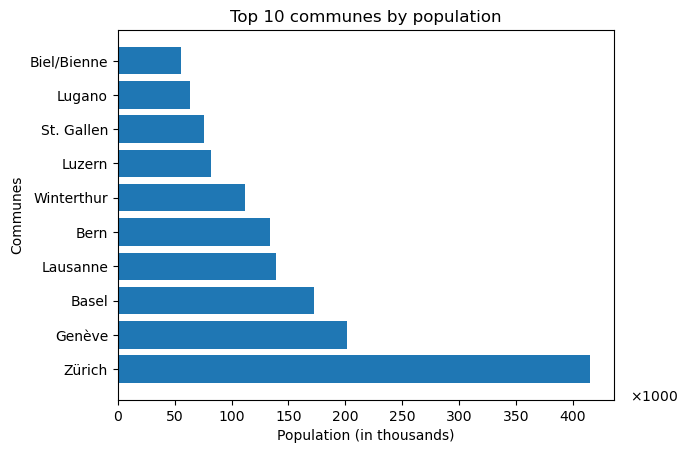

In [50]:
plt.barh(top_communes["Commune"], top_communes["Residents"] / 1000)
plt.xlabel("Population (in thousands)")
plt.ylabel("Communes")
plt.title("Top 10 communes by population")
plt.text(450, -1, r"$\times 1000$", fontsize=10, ha="left", va="bottom")
plt.show()

The commune of Zurich comes out as the most populated commune, unsurprisingly given the analyses already done.

## Horizontal stacked bar chart (land subdivision of the top communes)

*Land subdivision* refers to the percentage of the surface area of a given commune that is allocated to each of the following: settlement area, agricultural area, wooded area and unproductive area. Furthermore, each of these areas is represented by a `df` column and its values are only percentages.

Because of this, their sum is supposed to match 100% and I am checking this condition before using them to build any barplot, as otherwise it would mean there are some outliers in such columns that I need to take care of.

In [51]:
top_communes.loc[:, "Settlement area":"Unproductive area"].sum(axis=1)

0    100.0
1    100.0
2    100.0
3    100.0
4    100.0
5    100.0
6    100.0
7    100.0
8    100.0
9    100.0
dtype: float64

Having checked that, with a reassuring result, I can now proceed plotting 4 different horizontal bar plots in the same figure, one per area type. The dataframe used as source is still `top_communes` as only the top 10 populated communes are being assessed.

The creation of each plot is quite repetitive, I have only to be careful about the `left` argument of `plt.barh()`, as it must be properly set to ensure that each area type is being plotted on top of (or better, right next to) the plot of the previous one displayed.

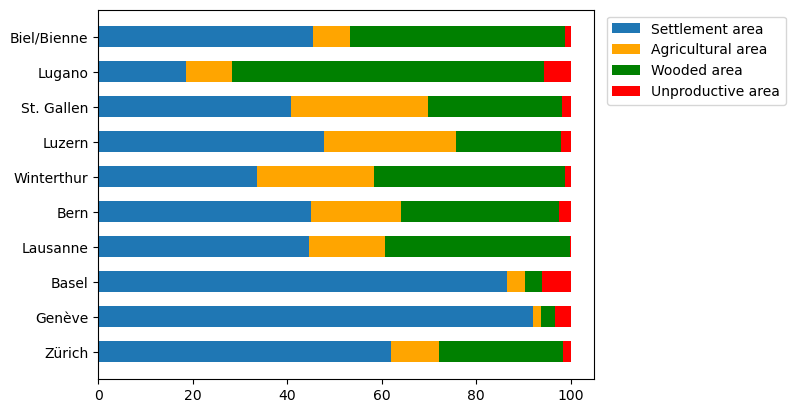

In [52]:
plt.barh(
    top_communes["Commune"],
    top_communes["Settlement area"],
    height=0.6,
    label="Settlement area",
)
plt.barh(
    top_communes["Commune"],
    top_communes["Agricultural area"],
    height=0.6,
    color="orange",
    left=top_communes["Settlement area"],
    label="Agricultural area",
)
plt.barh(
    top_communes["Commune"],
    top_communes["Wooded area"],
    height=0.6,
    color="green",
    left=top_communes["Agricultural area"] + top_communes["Settlement area"],
    label="Wooded area",
)
plt.barh(
    top_communes["Commune"],
    top_communes["Unproductive area"],
    height=0.6,
    color="red",
    left=top_communes["Wooded area"]
    + top_communes["Agricultural area"]
    + top_communes["Settlement area"],
    label="Unproductive area",
)
plt.legend(loc="upper right", bbox_to_anchor=(1.4, 1))
plt.show()

It turns out that all the top communes have a relatively limited unproductive area, but while Basel and Genève have a surface area predominantly destined to settlement, Lugano shows exactly the opposite scenario: most of its area is wooded, and only a small part is destined to settlement.

It is a surprising discovery considering that still Lugano is the 9th most populated Swiss commune.

## Histogram (communes by proportion of young residents)

The column *0-19 years* of `df` directly provides the percentage of young residents of each commune.

In [53]:
df["0-19 years"]

0       19.677094
1       20.508627
2       23.666186
3       21.804918
4       21.772898
          ...    
2194    18.888889
2195    21.869919
2196    18.895801
2197    18.264840
2198    21.514630
Name: 0-19 years, Length: 2199, dtype: float64

To visualize the numerosity of each percentage bucket through an histogram, I am firstly preparing such buckets with `np.linspace()`.

In [54]:
np.linspace(5, 35, 7)

array([ 5., 10., 15., 20., 25., 30., 35.])

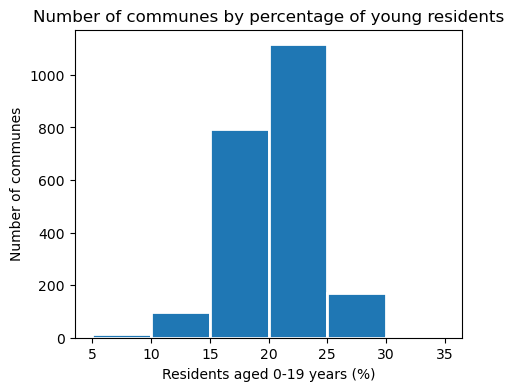

In [55]:
plt.figure(figsize=(5, 4))
plt.hist(df["0-19 years"], bins=np.linspace(5, 35, 7), edgecolor="white", linewidth=2.0)
plt.ylabel("Number of communes")
plt.xlabel("Residents aged 0-19 years (%)")
plt.title("Number of communes by percentage of young residents")
plt.show()

The resulting histogram clearly indicates a prevalence of communes having from 15% to 25% young population. It is interesting to notice as well that the 0-19 years age group never surpasses the 30% of the population of a commune.

## Violin plot: Age group 0-19 years across four language regions

In order to spot the languages of Switzerland, I am searching for the unique values found in the *Language* column of `df`.

In [56]:
df["Language"].unique()

array(['de', 'fr', 'rm', 'it'], dtype=object)

I can then assess the numerosity of communes by young population in each of the language regions using a violin plot. By setting the style to *whitegrid* I can increase the readibility of the chart emphasizing the ticks on the y-axis.

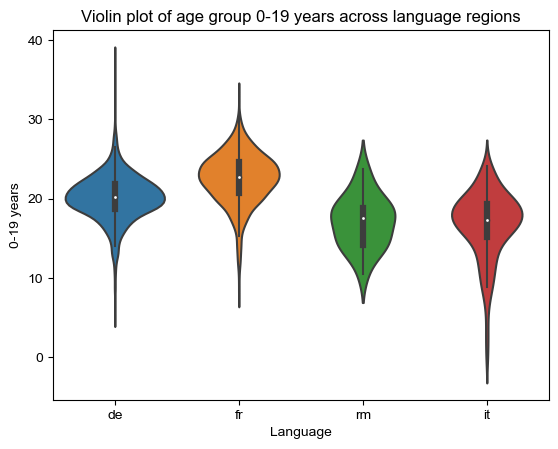

In [57]:
sns.violinplot(data=df, x="Language", y="0-19 years")
plt.title("Violin plot of age group 0-19 years across language regions")
sns.set_style("whitegrid")
plt.show()

The resulting violin plot demonstrates how the French speaking region has the highest average percentage of young population overall, while the Italian speaking region has the lowest.
Additionally, the German speaking region has a larger numerosity of communes concentrated around its 20% average: while the French speaking regions has an higher average, it also shows a broader distribution.

## Violin plot of age groups across language regions

The same exercise can be repeated for all age groups, conveniently visualizing the resulting violin plots in adjacent subplots.
Using a `for` loop comes natural considering the inherent repetitiveness of this task.

In [58]:
age_groups = ["0-19 years", "20-64 years", "65 years or over"]

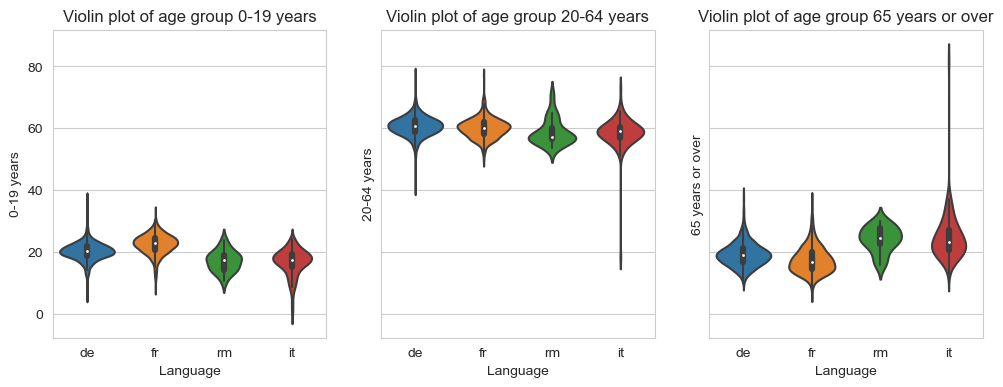

In [59]:
fig, ax = plt.subplots(
    nrows=1,
    ncols=3,
    sharey=True,
    figsize=(12, 4),
    gridspec_kw={"wspace": 0.2},
)

for i in range(0, 3):

    sns.violinplot(
        data=df,
        x="Language",
        y=age_groups[i],
        ax=ax[i],
    )
    ax[i].set_title(f"Violin plot of age group {age_groups[i]}")

# fig.tight_layout()
plt.show()

Unsurprisingly the 20-64 age group is the most prevalent regardless of the language region, with a fairly common 60% average. Additionally, the former conclusion on the 0-19 age group is partly proven also by the 65+ age group, which is shown behind more prevalent also in the Italian speaking region.

## Pairplot: relationships between communal areas

To effectively investigate the relationships between communal areas, I chose to leverage the output of a pairplot, by definition showing the relationship of each variable (`df` column) with all the others, focusing only the columns related to the communal areas, in particular picking *Agricultural area* for the y-axis.
With `kind="reg"` I indicated my preference for a regression plot, thus specifying some plot keywords to improve the readibility of the resulting plots (`s` is related to the size of each point, while `alpha=0.5` imposes a saturation level that highlights areas in which most points/communes are concentrated).

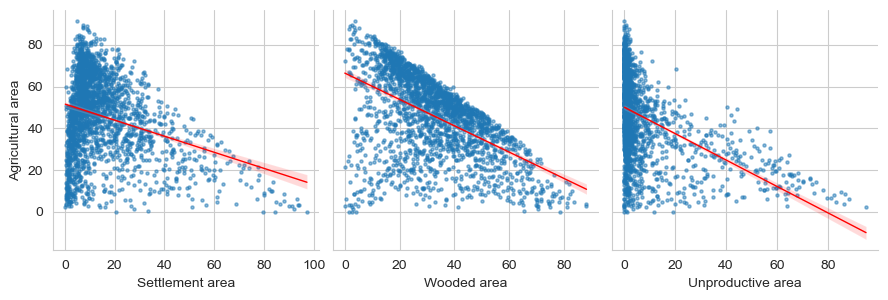

In [60]:
sns.pairplot(
    df,
    x_vars=["Settlement area", "Wooded area", "Unproductive area"],
    y_vars=["Agricultural area"],
    height=3.0,
    kind="reg",
    plot_kws={
        "scatter_kws": {"s": 5, "alpha": 0.5},
        "line_kws": {"color": "red", "linewidth": 1},
    },
)
plt.show()

With a bit of disappointment, I must notice that a linear relationship does not adequately represent any pair of variables. Nonetheless, by filtering one of the two variables to focus only on the higher density area, it would then more reasonable to assume a linear relationship.
As a further confirmation, the correlation matrix below shows that no pair of variables is associated to a linear correlation coefficient truly close to 1 or -1, hence no linear relationship is actually in place.

In [61]:
correlation_matrix = df[
    ["Agricultural area", "Settlement area", "Wooded area", "Unproductive area"]
].corr()
print(correlation_matrix)

                   Agricultural area  Settlement area  Wooded area  \
Agricultural area           1.000000        -0.293967    -0.527690   
Settlement area            -0.293967         1.000000    -0.330598   
Wooded area                -0.527690        -0.330598     1.000000   
Unproductive area          -0.459627        -0.265222    -0.077670   

                   Unproductive area  
Agricultural area          -0.459627  
Settlement area            -0.265222  
Wooded area                -0.077670  
Unproductive area           1.000000  


In order to analyze potential implications of the elevation in the regression plots above, first of all I want to quickly assess what's the distribution of the elevations of each commune. I am achieving this result with a simple histogram, based on the *Elevation* column of `df`, which shows how the majority of communes are located at an altitude lower than 1000 m.

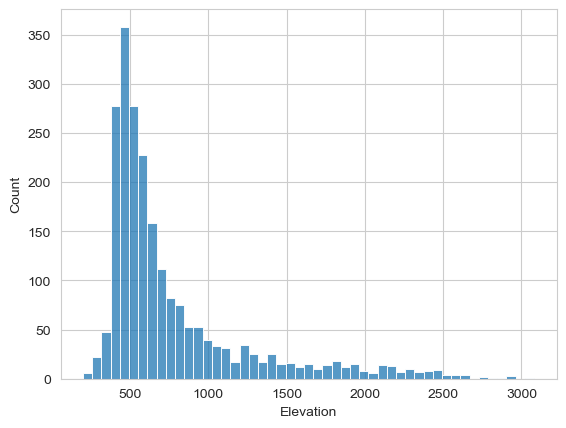

In [62]:
sns.histplot(df, x="Elevation")
plt.show()

I then choose to define a categorization associated to the elevation of the communes, to be then used as a color coding criteria in the regression plots. Hence I arbitrarily classified as *Low* altitudes lower than or equal to 750 m, as *Medium* the ones between 750 m and 1500 m and as *High* the ones above.

I then stored this information in a new column named *Elevation category*.

In [63]:
def categorize_elevation(elevation):
    if elevation <= 750:
        return "Low"
    elif 750 < elevation < 1500:
        return "Medium"
    else:
        return "High"


df["Elevation category"] = df["Elevation"].apply(
    categorize_elevation
)  # applying the categorization function to each element of the Elevation column

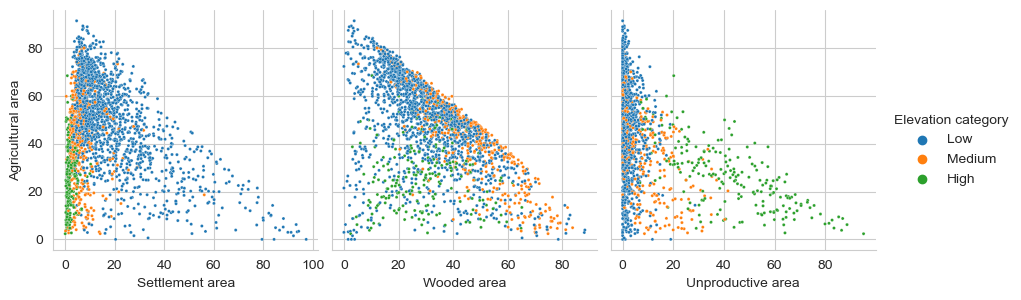

In [64]:
sns.pairplot(
    df,
    x_vars=["Settlement area", "Wooded area", "Unproductive area"],
    y_vars=["Agricultural area"],
    height=3.0,
    # kind="reg",
    plot_kws={"s": 5},
    hue="Elevation category",
)
plt.show()

The first of the resulting 3 plots indicates that all the communes at a high altitude have a settlement area nearing 0%, along with a relatively moderate agricultural area (mostly below 40%, while the majority of low altitude communes is topping that percentage).
Additionally, the last plot demonstrates that the high altitude communes are also the ones having the greatest prevalence of unproductive area.

## Scatterplot: Commune map of Switzerland

In order to perform the previous analysis I had already created a categorization column, i.e. *Elevation category*, that can be found at the bottom right of the `df` table.

In [65]:
df.head(3)

,Canton,Commune,Language,Residents,Population density per km²,0-19 years,20-64 years,65 years or over,Private households,Surface area in km²,Settlement area,Agricultural area,Wooded area,Unproductive area,East coordinate,North coordinate,Elevation,Elevation category
0,ZH,Aeugst am Albis,de,1982,250.568900,19.677094,62.764884,17.558022,835,7.91,12.658228,51.139241,30.886076,5.316456,2679300,1235700,673,Low
1,ZH,Affoltern am Albis,de,12229,1154.768650,20.508627,61.329626,18.161747,5348,10.59,30.674264,40.170940,28.205128,0.949668,2676800,1236800,502,Low
2,ZH,Bonstetten,de,5548,746.702557,23.666186,60.310022,16.023792,2325,7.43,15.456989,55.510753,28.629032,0.403226,2677800,1241000,583,Low


Nonetheless, with the intention to use the elevation itself as color-coding criterion, and not a qualitative scale, I had to redefine the *Elevation category* column, hence the `categorize_elevation()` function.

In order to simplify the variance of elevations reducing it to multiples of 500 metres (collected in an array using `np.linspace()`), I chose to approximate by excess each elevation to the nearest multiple of 500 above it. The only exception occurs for communes at an altitude higher than 3000, for which I choose to assign 3000 as they are anyway closer to 3000 than 3500 (the commune with the highest elevation is Fieschertal, at 3080 metres).


In [66]:
np.linspace(500, 3000, 6)

array([ 500., 1000., 1500., 2000., 2500., 3000.])

In [67]:
print(f"The maximum elevation is: {df['Elevation'].max()} metres")
df[df["Elevation"] == df["Elevation"].max()]["Commune"]

The maximum elevation is: 3080 metres


1966    Fieschertal
Name: Commune, dtype: object

***
_**Note:** Out of curiosity I researched more information about the commune of Fieschertal on Google, and I was surprised to see that its actual altitude is 1108 metres. This huge difference puts a question mark on the reliability of the collected values, because of which automating a verification with Google results might be considered necessary. Not having the technical capability, at the present moment, to do that, I chose to correct this spot value hoping for it to be just an outlier._

_After further investigation, I had found this issue occurring with several of elevations values reported as higher than 2126 metres, i.e. the altitude of the commune of Juf, indicated **[here](https://www.eda.admin.ch/aboutswitzerland/it/home/umwelt/geografie/geografie---fakten-und-zahlen.html)** as the highest Swiss commune._

_Ultimately, I could reasonably move on with the assessment of altitudes only with the assumption that the values collected in `df` do not reflect the average altitude of the commune, but they take the highest altitude that can be found in the territory of each commune. While this is an acceptable option, certainly it remains debatable._
***

In [68]:
df.loc[
    1966, "Elevation"
] = 1108  # assigning 1108 as altitude of Fieschertal, having row index of 1966

print(f"The maximum elevation is: {df['Elevation'].max()} metres")
df[df["Elevation"] == df["Elevation"].max()]["Commune"]

The maximum elevation is: 2952 metres


2056    Randa
Name: Commune, dtype: object

In [69]:
def categorize_elevation(elevation):
    elevation_array = np.linspace(500, 3000, 6)
    for i in elevation_array:
        if elevation <= i:
            return int(i)
            break
        if elevation > 3000:
            return 3000


df["Elevation category"] = df["Elevation"].apply(categorize_elevation)

Having defined the color-coding categorization, I can now build a scatterplot showing the commune map of Switzerland by plotting the East and North coordinates of each commune, divided by $10^6$ to represent a more readable scale on both axes.

The notation `transform=plt.gca().transAxes` serves the purpose of defining the position of axis labels in terms of relative axis coordinates, hence from 0 to 1, rather than on the basis of the values in each axis, making the label setting significantly easier.

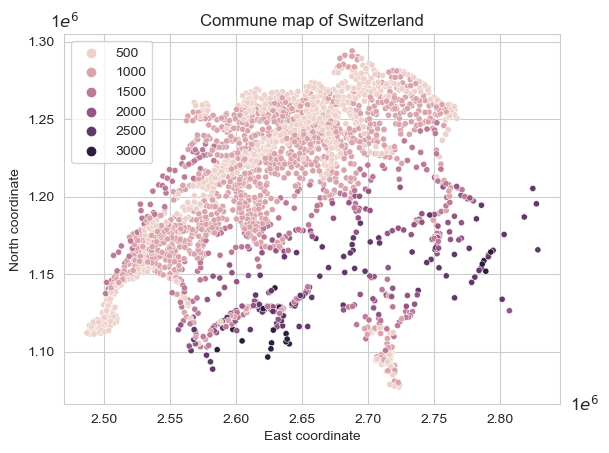

In [70]:
sns.scatterplot(
    data=df,
    x=df["East coordinate"] / (10 ** 6),
    y=df["North coordinate"] / (10 ** 6),
    s=20,
    hue="Elevation category",
)
sns.set_style("ticks")
plt.legend(title="", loc="upper left")
plt.text(1.02, 0, "1$e^6$", transform=plt.gca().transAxes, va="center", fontsize=12)
plt.text(0, 1.02, "1$e^6$", transform=plt.gca().transAxes, ha="center", fontsize=12)
plt.title("Commune map of Switzerland")
plt.show()

I can then generate a similar scatterplot using *Language* as color-coding criterion, with the intent to highlight the four language regions of Switzerland.

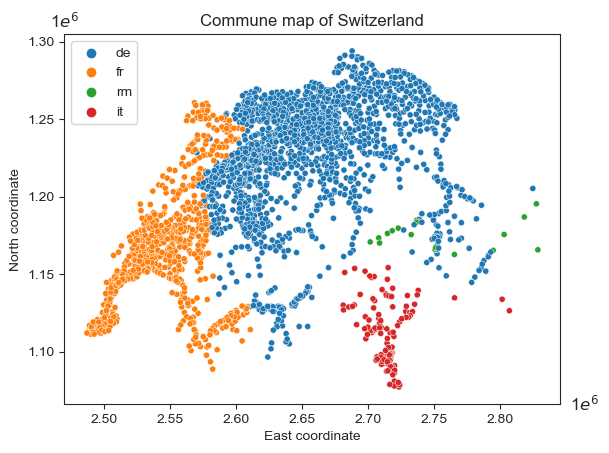

In [71]:
sns.scatterplot(
    data=df,
    x=df["East coordinate"] / (10 ** 6),
    y=df["North coordinate"] / (10 ** 6),
    s=20,
    hue="Language",
)
sns.set_style("ticks")
plt.legend(loc="upper left")
plt.text(1.02, 0, "1$e^6$", transform=plt.gca().transAxes, va="center", fontsize=12)
plt.text(0, 1.02, "1$e^6$", transform=plt.gca().transAxes, ha="center", fontsize=12)
plt.title("Commune map of Switzerland")
plt.show()

## Commune maps of Switzerland as subplots

Similarly to what has been done for the violin plots, I can generate two subplots to represent the two scatterplots shown separately above, for easier comparation.

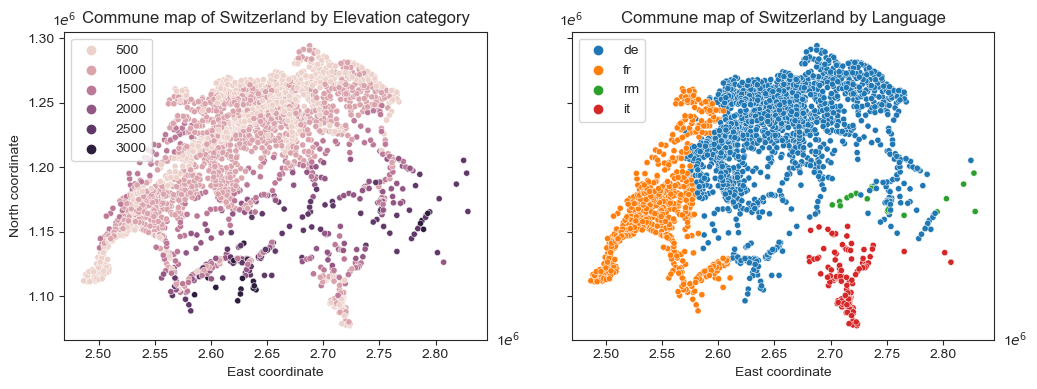

In [72]:
hues = ["Elevation category", "Language"]
fig, ax = plt.subplots(
    nrows=1,
    ncols=2,
    sharey=True,
    figsize=(12, 4),
    gridspec_kw={"wspace": 0.2},
)

for i in range(0, 2):
    sns.scatterplot(
        data=df,
        x=df["East coordinate"] / (10 ** 6),
        y=df["North coordinate"] / (10 ** 6),
        s=20,
        hue=hues[i],
        ax=ax[i],
    )
    ax[i].legend(loc="upper left")
    ax[i].text(
        1.02, 0, "1$e^6$", transform=ax[i].transAxes, va="center", fontsize=10
    )  # no need to use plt.gca() as I am already taking the axis object with ax[i]
    ax[i].text(0, 1.02, "1$e^6$", transform=ax[i].transAxes, ha="center", fontsize=10)
    ax[i].set_title(f"Commune map of Switzerland by {hues[i]}")

plt.show()

The Swiss map based on Elevation category highlights the three main geographical regions of the country: the Jura region in the North-West, with altitudes approaching 1500 metres, the Swiss Alps, with communes from an altitude of about 1500 metres all the way up to 3000 metres, and lastly the Central Plateau, in between the two former regions, with altitudes noticeably below 1000 metres, and frequently below 500.

On the other hand, the Swiss map of the language regions clearly demonstrates how the (Swiss)German-speaking region is the most prevalent one, spanning from the North up to a few southern areas, followed by the French-speaking region, firmly located in Western Switzerland, and the Italian-speaking region in the South, constituted primarily by the canton Tessin.

Romansh is instead only spoken in a few communes in South-Eastern Switzerland, also a bit scattered from one another.

# Probabilities

The objective of this section is to compute the probability that a randomly selected commune with elevation over 2000 is from the canton of Valais.

First and foremost, let's start by generating a filtered version of `df` containing only communes with elevation over 2000.

In [73]:
filtered_df = df[df["Elevation"] > 2000]

After that, I am preparing a series containing the number of communes per each canton of `filtered_df`. This is easily done by leveraging `groupby("Canton")`, to then consider only the *Commune* column of its output for applying the aggregation function `count()`.

From this series I can observe that the canton of Valais is the one to which most of the communes at an elevation over 2000 metres belong, but more importantly, I can use this series to calculate the **expected value** of the probability of the event analyzed in this task.

In [74]:
filtered_series = filtered_df.groupby("Canton")["Commune"].count()
filtered_series

Canton
BE     5
GR    34
TI     4
UR     6
VS    48
Name: Commune, dtype: int64

The expected value is simply the number of communes with an elevation of over 2000 metres belonging to canton Valais, divided by the total number of communes also above 2000 metres.

In [75]:
filtered_series["VS"] / filtered_series.sum()

0.4948453608247423

Having determined the expected value, I can now confirm it computing it as output of a considerable number of experiments. In order to do so, I am gathering the indexes of `filtered_df` inside a dedicated list. These indexes, while still being in ascending order, do not start from zero nor they result from unit increases, as a varying number of rows had been filtered out from `df` in between.

For a more streamlined view I could have resetted the index, but I found it superflous at this moment.

In [76]:
index_list = list(filtered_df.index)
print(index_list)

[291, 299, 306, 408, 410, 586, 592, 594, 596, 600, 604, 1129, 1130, 1132, 1137, 1152, 1153, 1155, 1158, 1161, 1162, 1169, 1170, 1171, 1172, 1173, 1174, 1175, 1176, 1177, 1178, 1179, 1180, 1181, 1182, 1183, 1184, 1185, 1191, 1198, 1199, 1203, 1224, 1225, 1227, 1529, 1530, 1538, 1624, 1946, 1947, 1948, 1949, 1950, 1954, 1956, 1957, 1958, 1959, 1962, 1963, 1968, 1969, 1970, 1971, 1972, 1976, 1978, 1981, 1982, 1985, 1987, 1998, 2010, 2013, 2016, 2017, 2020, 2021, 2024, 2027, 2031, 2044, 2048, 2051, 2052, 2053, 2056, 2057, 2058, 2059, 2060, 2061, 2063, 2064, 2067, 2069]


By arbitrarily choosing a relevant number of experiments to run, I can keep track in a counter of how many times a commune randomly picked from `filtered_df` belonged to the canton of Valais.

Finally, dividing the counter (number of successful experiments) by the total number of experiments, I can compute the probability of the target event, which unsurprisingly comes very close to the expected value at about 49%.

In [77]:
experiments = 10000
counter = 0
for i in range(experiments):
    row_index = index_list[
        random.randrange(len(index_list))
    ]  # picks a random positional index to access an item of the index_list
    canton = filtered_df.loc[row_index, "Canton"]
    if canton == "VS":
        counter += 1

counter / experiments

0.4921

# Matrices

The objective of this task is to define a data frame matrix whose rows correspond to communes and the columns to the cantons, thus filling in the matrix with 0/1 values where entry $(i,j)$ is a 1 if the commune in row i is in the canton in column j and a 0 otherwise.

I had already defined the list of cantons, containing all the 26 Swiss cantons.

In [78]:
len(cantons)

26

Similarly, I can prepare a list of all the Swiss communes, checking that it contains 2199 of them as expected from previous analyses.

In [79]:
communes = list(df["Commune"].unique())
len(communes)

2199

I can now generate a data frame matrix using these two lists respectively as columns and rows. The resulting matrix will contain only null values.

In [80]:
df_matrix = pd.DataFrame(index=communes, columns=cantons)
df_matrix

,ZH,BE,LU,UR,SZ,OW,NW,GL,ZG,FR,...,SG,GR,AG,TG,TI,VD,VS,NE,GE,JU
Aeugst am Albis,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Affoltern am Albis,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bonstetten,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Hausen am Albis,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Hedingen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vendlincourt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Basse-Allaine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Clos du Doubs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Haute-Ajoie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


After that, I am facilitating the operation of value assignment I will perform later on by setting the index of `df` as the *Commune* column.

In [81]:
df.set_index("Commune", inplace=True)
df.head(3)

,Canton,Language,Residents,Population density per km²,0-19 years,20-64 years,65 years or over,Private households,Surface area in km²,Settlement area,Agricultural area,Wooded area,Unproductive area,East coordinate,North coordinate,Elevation,Elevation category
Commune,,,,,,,,,,,,,,,,,
Aeugst am Albis,ZH,de,1982,250.568900,19.677094,62.764884,17.558022,835,7.91,12.658228,51.139241,30.886076,5.316456,2679300,1235700,673,1000
Affoltern am Albis,ZH,de,12229,1154.768650,20.508627,61.329626,18.161747,5348,10.59,30.674264,40.170940,28.205128,0.949668,2676800,1236800,502,1000
Bonstetten,ZH,de,5548,746.702557,23.666186,60.310022,16.023792,2325,7.43,15.456989,55.510753,28.629032,0.403226,2677800,1241000,583,1000


Looping over every commune, I can ultimately check to which canton of `df_matrix` it belongs, assigning 1 for the corresponding position in the matrix, and 0 for all the positions without a match.

In [82]:
for com in communes:
    for cant in cantons:
        if df.loc[com, "Canton"] == cant:
            df_matrix.loc[com, cant] = 1
        else:
            df_matrix.loc[com, cant] = 0

df_matrix

,ZH,BE,LU,UR,SZ,OW,NW,GL,ZG,FR,...,SG,GR,AG,TG,TI,VD,VS,NE,GE,JU
Aeugst am Albis,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Affoltern am Albis,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Bonstetten,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Hausen am Albis,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Hedingen,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vendlincourt,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
Basse-Allaine,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
Clos du Doubs,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
Haute-Ajoie,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


Finally, with the purpose to check the accurateness of the resulting matrix, I want to check if the total number of communes per canton determined from `df`using `groupby` (collected in *check1* series, sorting cantons alphabetically) matches the total number of communes per canton determined by summing the values of each of `df_matrix` columns (collected in *check2* series, also then sorted alphabetically).

In [83]:
df.reset_index(inplace=True)
check1 = df.groupby("Canton")[
    "Commune"
].count()  # getting a series with the number of communes of each canton
check1.sort_index(inplace=True)  # sorting cantons alphabetically
check1

Canton
AG    210
AI      6
AR     20
BE    341
BL     86
BS      3
FR    131
GE     45
GL      3
GR    105
JU     53
LU     82
NE     31
NW     11
OW      7
SG     77
SH     26
SO    109
SZ     30
TG     80
TI    115
UR     20
VD    309
VS    126
ZG     11
ZH    162
Name: Commune, dtype: int64

In [84]:
check2 = df_matrix.sum()
check2.sort_index(inplace=True)
check2

AG    210
AI      6
AR     20
BE    341
BL     86
BS      3
FR    131
GE     45
GL      3
GR    105
JU     53
LU     82
NE     31
NW     11
OW      7
SG     77
SH     26
SO    109
SZ     30
TG     80
TI    115
UR     20
VD    309
VS    126
ZG     11
ZH    162
dtype: object

In [85]:
check1 == check2

Canton
AG    True
AI    True
AR    True
BE    True
BL    True
BS    True
FR    True
GE    True
GL    True
GR    True
JU    True
LU    True
NE    True
NW    True
OW    True
SG    True
SH    True
SO    True
SZ    True
TG    True
TI    True
UR    True
VD    True
VS    True
ZG    True
ZH    True
dtype: bool

The successful result confirms that the matrix has been generated correctly according to the task objective.